In [1]:
import numpy as np
import matplotlib.pyplot as plt

# circle_indicator_function returns 1 if ||x-b||^2 > r^2 and -1 otherwise
def circle_indicator_function(x, r, b):
    if np.linalg.norm ( x-b )**2 >r**2:
        y = 1
    else:
        y=-1
    return y

# linear_data_generating_function return 1 if w^Tx + b > 0 and -1 otherwise
#def linear_data_generating_function(x, w, b):
#    if (np.dot (w,x) + b) >0:
#        y = 1
#    else:
#        y=-1
#    return y

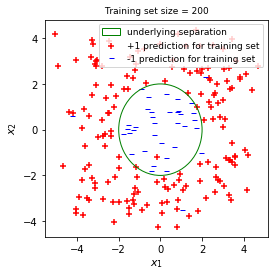

In [2]:
np.random.seed(42)

#generate training and testing data
x_min = -4
x_max = 4
b=np.array ([0,0])
r = 2
n_data = 1000
n_train =200
mu=0.5

data_x = np.random.uniform(x_min,x_max, size=(n_data,2))+ + np.random.normal(0,mu,size=(n_data, 2)) 
data_y=np.array([circle_indicator_function(xi, r, b)  for xi in data_x]) + np.random.normal(0,mu,n_data)
data_y = (2.0 * (data_y > 0.0) - 1.0)

x_train,x_test = data_x[:n_train, :],data_x[n_train:, :]
y_train,y_test = data_y[:n_train],data_y[n_train:]

#save training and testing data
np.savetxt("svm-train.txt",np.vstack([x_train[:,0],x_train[:,1], y_train]).transpose())
np.savetxt("svm-test.txt",np.vstack([x_test[:,0],x_test[:,1],y_test]).transpose())

#plot the training  data
yplus = np.ma.masked_where(y_train<=0, y_train)
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train>0, y_train)
xminus = x_train[~np.array(yminus.mask)]

figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 prediction for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for training set')
circ=plt.Circle(b, radius=r, color='g', fill=False, label = 'underlying separation')
ax.add_patch(circ)
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% n_train, fontsize=9)  
ax.axis('tight')
ax.legend(handles=[circ, pluses, minuses], fontsize=9)
plt.show()